In [1]:
import numpy as np
import pandas as pd

# Specify encoding to handle UnicodeDecodeError
data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\capstone vickey\\spam.csv", encoding='latin1')

# Now you can proceed with your data manipulation and analysis
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [2]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True) #droping last 3 columns

In [5]:
data.rename(columns={'v1':'Target','v2':'Mail-Text'},inplace=True)

In [8]:
data.sample(6)

,Target,Mail-Text
5248,0,U come n search tat vid..not finishd..
4647,0,We are okay. Going to sleep now. Later
3063,0,Ok. How many should i buy.
20,0,Is that seriously how you spell his name?
2237,0,"Give her something to drink, if she takes it a..."
5178,1,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...


In [9]:
# Encoding data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data.tail(6)

,Target,Mail-Text
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [13]:
# 2. Data visualization
data['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

In [14]:
data.rename(columns={'Target':'Type'},inplace=True)

data['Type'].value_counts()

0    4825
1     747
Name: Type, dtype: int64

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


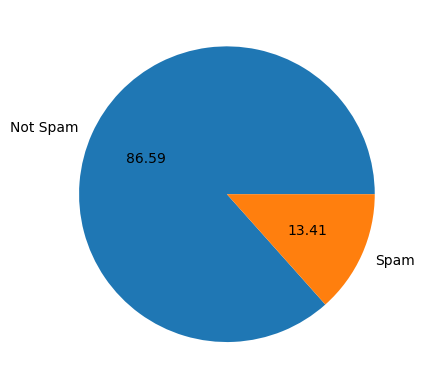

In [15]:
# pie chart
import matplotlib.pyplot as plt
plt.pie(data['Type'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data['num_characters']=data['Mail-Text'].apply(len) # number of characters in a mail
data.rename(columns={'num_characters':'Character Count'},inplace=True)
data.head(3)

,Type,Mail-Text,Character Count,Character Count
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155


In [20]:
data['Mail-Text'].apply(lambda x:nltk.word_tokenize(x)) ## Breaking sentence into number of words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Mail-Text, Length: 5572, dtype: object

In [21]:
data['Mail-Text'].apply(lambda x:len(nltk.word_tokenize(x))) ## Counting number of words used in a Mail

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Mail-Text, Length: 5572, dtype: int64

In [22]:
data['Word Count'] = data['Mail-Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
data.head(4)

,Type,Mail-Text,Character Count,Character Count,Word Count
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24
1,0,Ok lar... Joking wif u oni...,29,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37
3,0,U dun say so early hor... U c already then say...,49,49,13


In [24]:
data['Sentence Count']=data['Mail-Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.tail(4)

,Type,Mail-Text,Character Count,Character Count,Word Count,Sentence Count
5568,0,Will Ì_ b going to esplanade fr home?,37,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,125,27,1
5571,0,Rofl. Its true to its name,26,26,7,2


In [25]:
data.describe()

,Type,Character Count,Character Count,Word Count,Sentence Count
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,80.118808,18.699390,1.996411
std,0.340751,59.690841,59.690841,13.741932,1.520159
min,0.000000,2.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,910.000000,220.000000,38.000000


In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Roaming')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'roam'

In [26]:
def transform_text(text):
    text = text.lower() # 1. Lower Case Convertion
    text = nltk.word_tokenize(text) # 2. Tokenization
    
    y=[] # 3. Removing special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. Removing stop words and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')
data['Mail-Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [32]:
data['Transformed-Text']=data['Mail-Text'].apply(transform_text)
data.head(4)

,Type,Mail-Text,Character Count,Character Count,Word Count,Sentence Count,Transformed-Text
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,49,13,1,u dun say earli hor u c alreadi say


In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=800,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(data[data['Type']==1]['Transformed-Text'].str.cat(sep=" "))

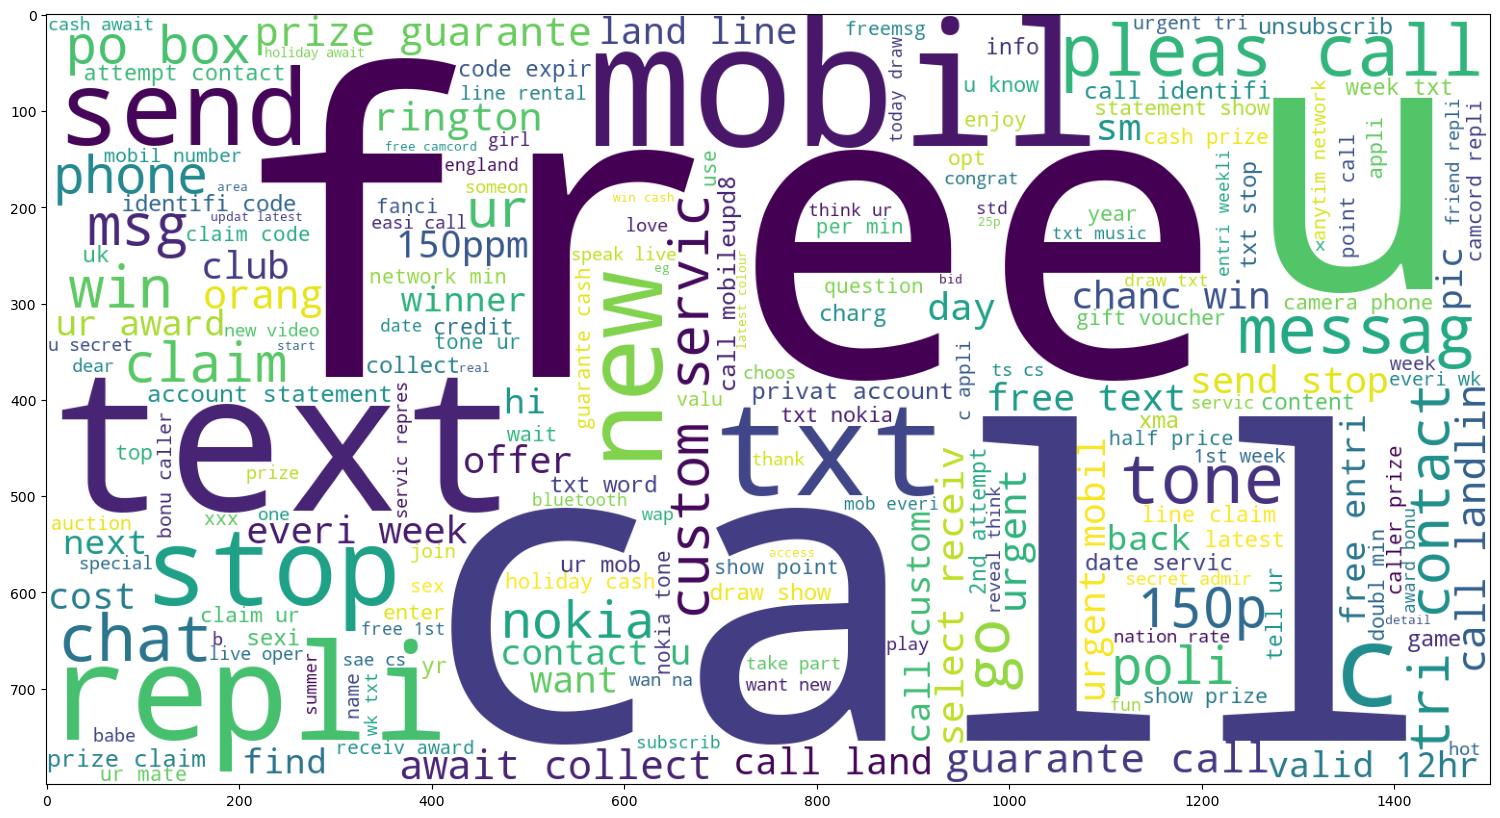

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [38]:
non_spam_wc = wc.generate(data[data['Type']==0]['Transformed-Text'].str.cat(sep=" "))

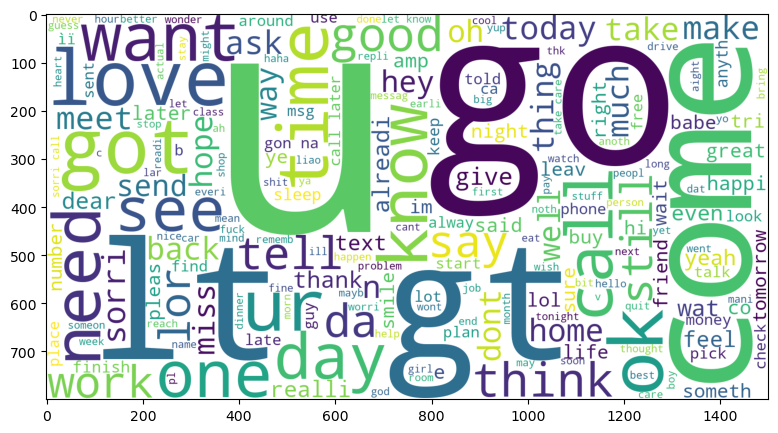

In [39]:
plt.figure(figsize=(12,5))
plt.imshow(non_spam_wc)

In [47]:
spam_word = []
for msg in data[data['Type']==1]['Transformed-Text'].tolist():
    for word in msg.split():
        spam_word.append(word)

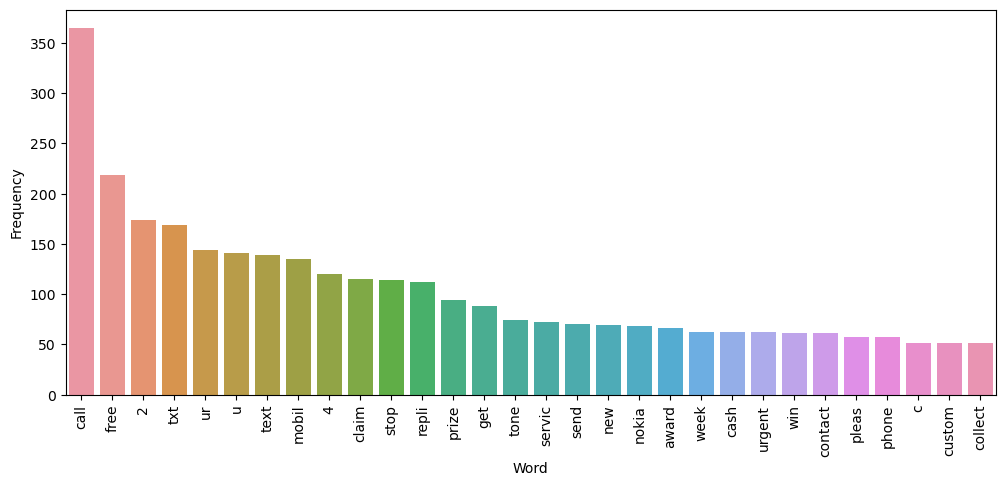

In [48]:
import seaborn as sns
data_frame = pd.DataFrame(Counter(spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
non_spam_word = []
for msg in data[data['Type']==0]['Transformed-Text'].tolist():
    for word in msg.split():
        non_spam_word.append(word)

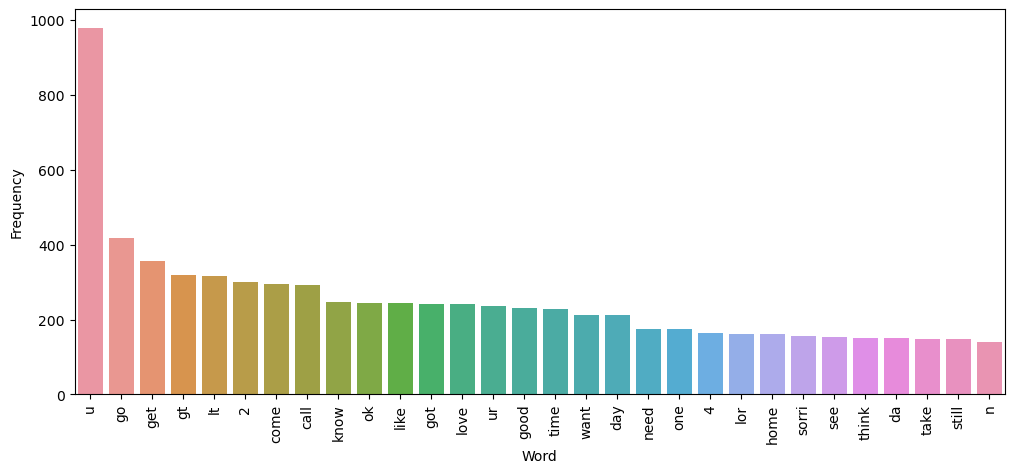

In [46]:
data_frame = pd.DataFrame(Counter(non_spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()